# $\textbf{PROGRAMMING ASSIGNMENT}$
# $\textbf{Lecture 4: DBSCAN}$

---

Data: [Wholesale Customers](https://archive.ics.uci.edu/dataset/292/wholesale+customers)

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### $\textbf{Exploratory Data Analysis}$

In [2]:
wholesale_customers = fetch_ucirepo(id=292)
wholesale_customers.variables

,name,role,type,demographic,description,units,missing_values
0,Channel,Feature,Categorical,None,None,None,no
1,Region,Target,Categorical,None,None,None,no
2,Fresh,Feature,Integer,None,None,None,no
3,Milk,Feature,Integer,None,None,None,no
4,Grocery,Feature,Integer,None,None,None,no
5,Frozen,Feature,Integer,None,None,None,no
6,Detergents_Paper,Feature,Integer,None,None,None,no
7,Delicassen,Feature,Integer,None,None,None,no


In [3]:
wholesale_customers.data.features.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [4]:
wholesale_customers.data.targets.head()

,Region
0,3
1,3
2,3
3,3
4,3


In [5]:
df = pd.merge(wholesale_customers.data.features, wholesale_customers.data.targets, left_index=True, right_index=True)
df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,3
4,2,22615,5410,7198,3915,1777,5185,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   Region            440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.543182
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.774272
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,3.000000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000


In [8]:
df.isna().sum()

Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Region              0
dtype: int64

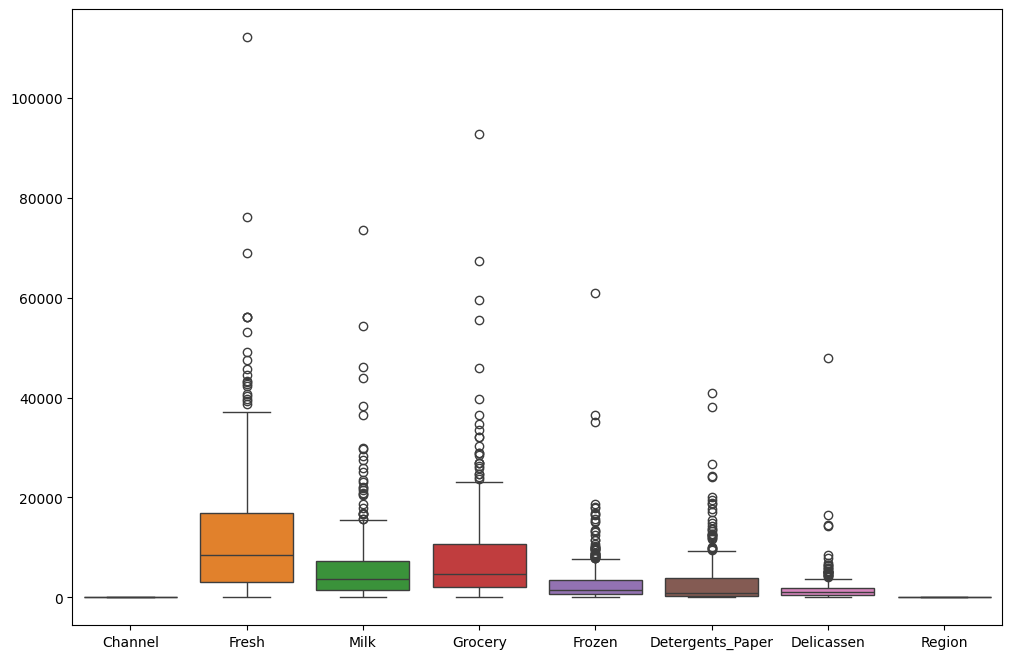

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

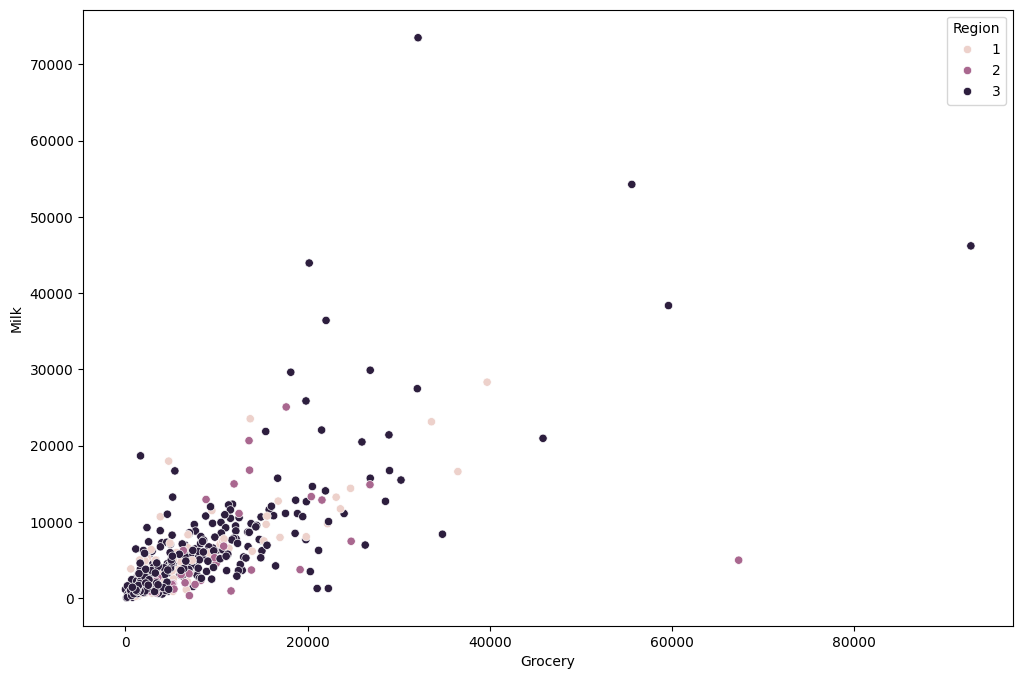

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Grocery', y='Milk', data=df, hue='Region')
plt.show()

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

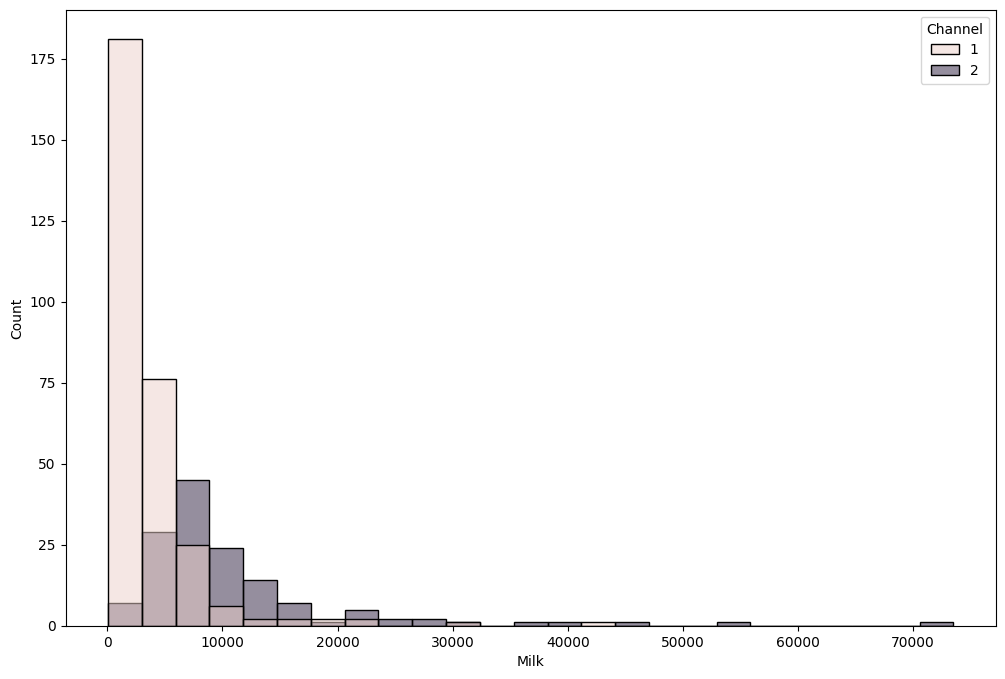

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Milk', bins=25, hue='Channel')
plt.show()

**TASK: Create an annotated clustermap of the correlations between spending on different categories.**

<Figure size 1200x800 with 0 Axes>

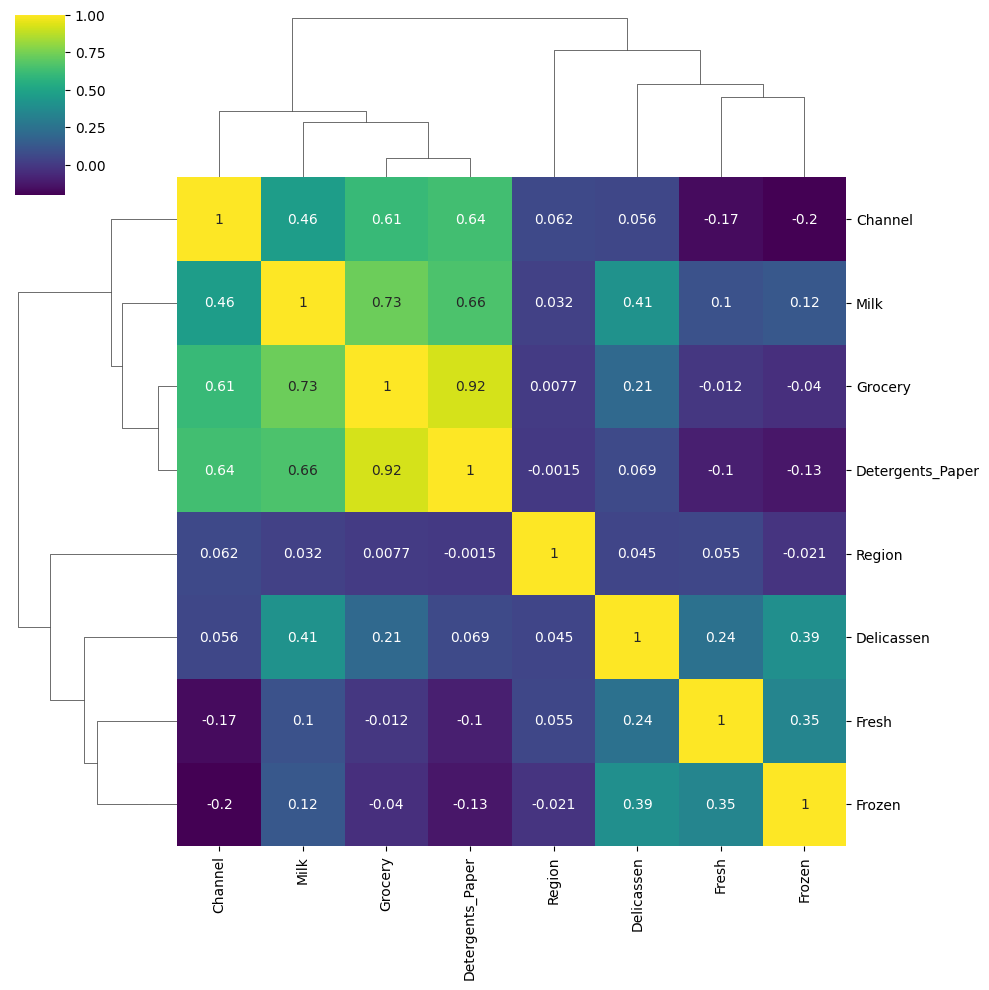

In [12]:
plt.figure(figsize=(12,8))
sns.clustermap(df.corr(), annot=True, cmap='viridis')
plt.show()

**TASK: Create a PairPlot of the dataframe, colored by Region.**

<Figure size 1200x800 with 0 Axes>

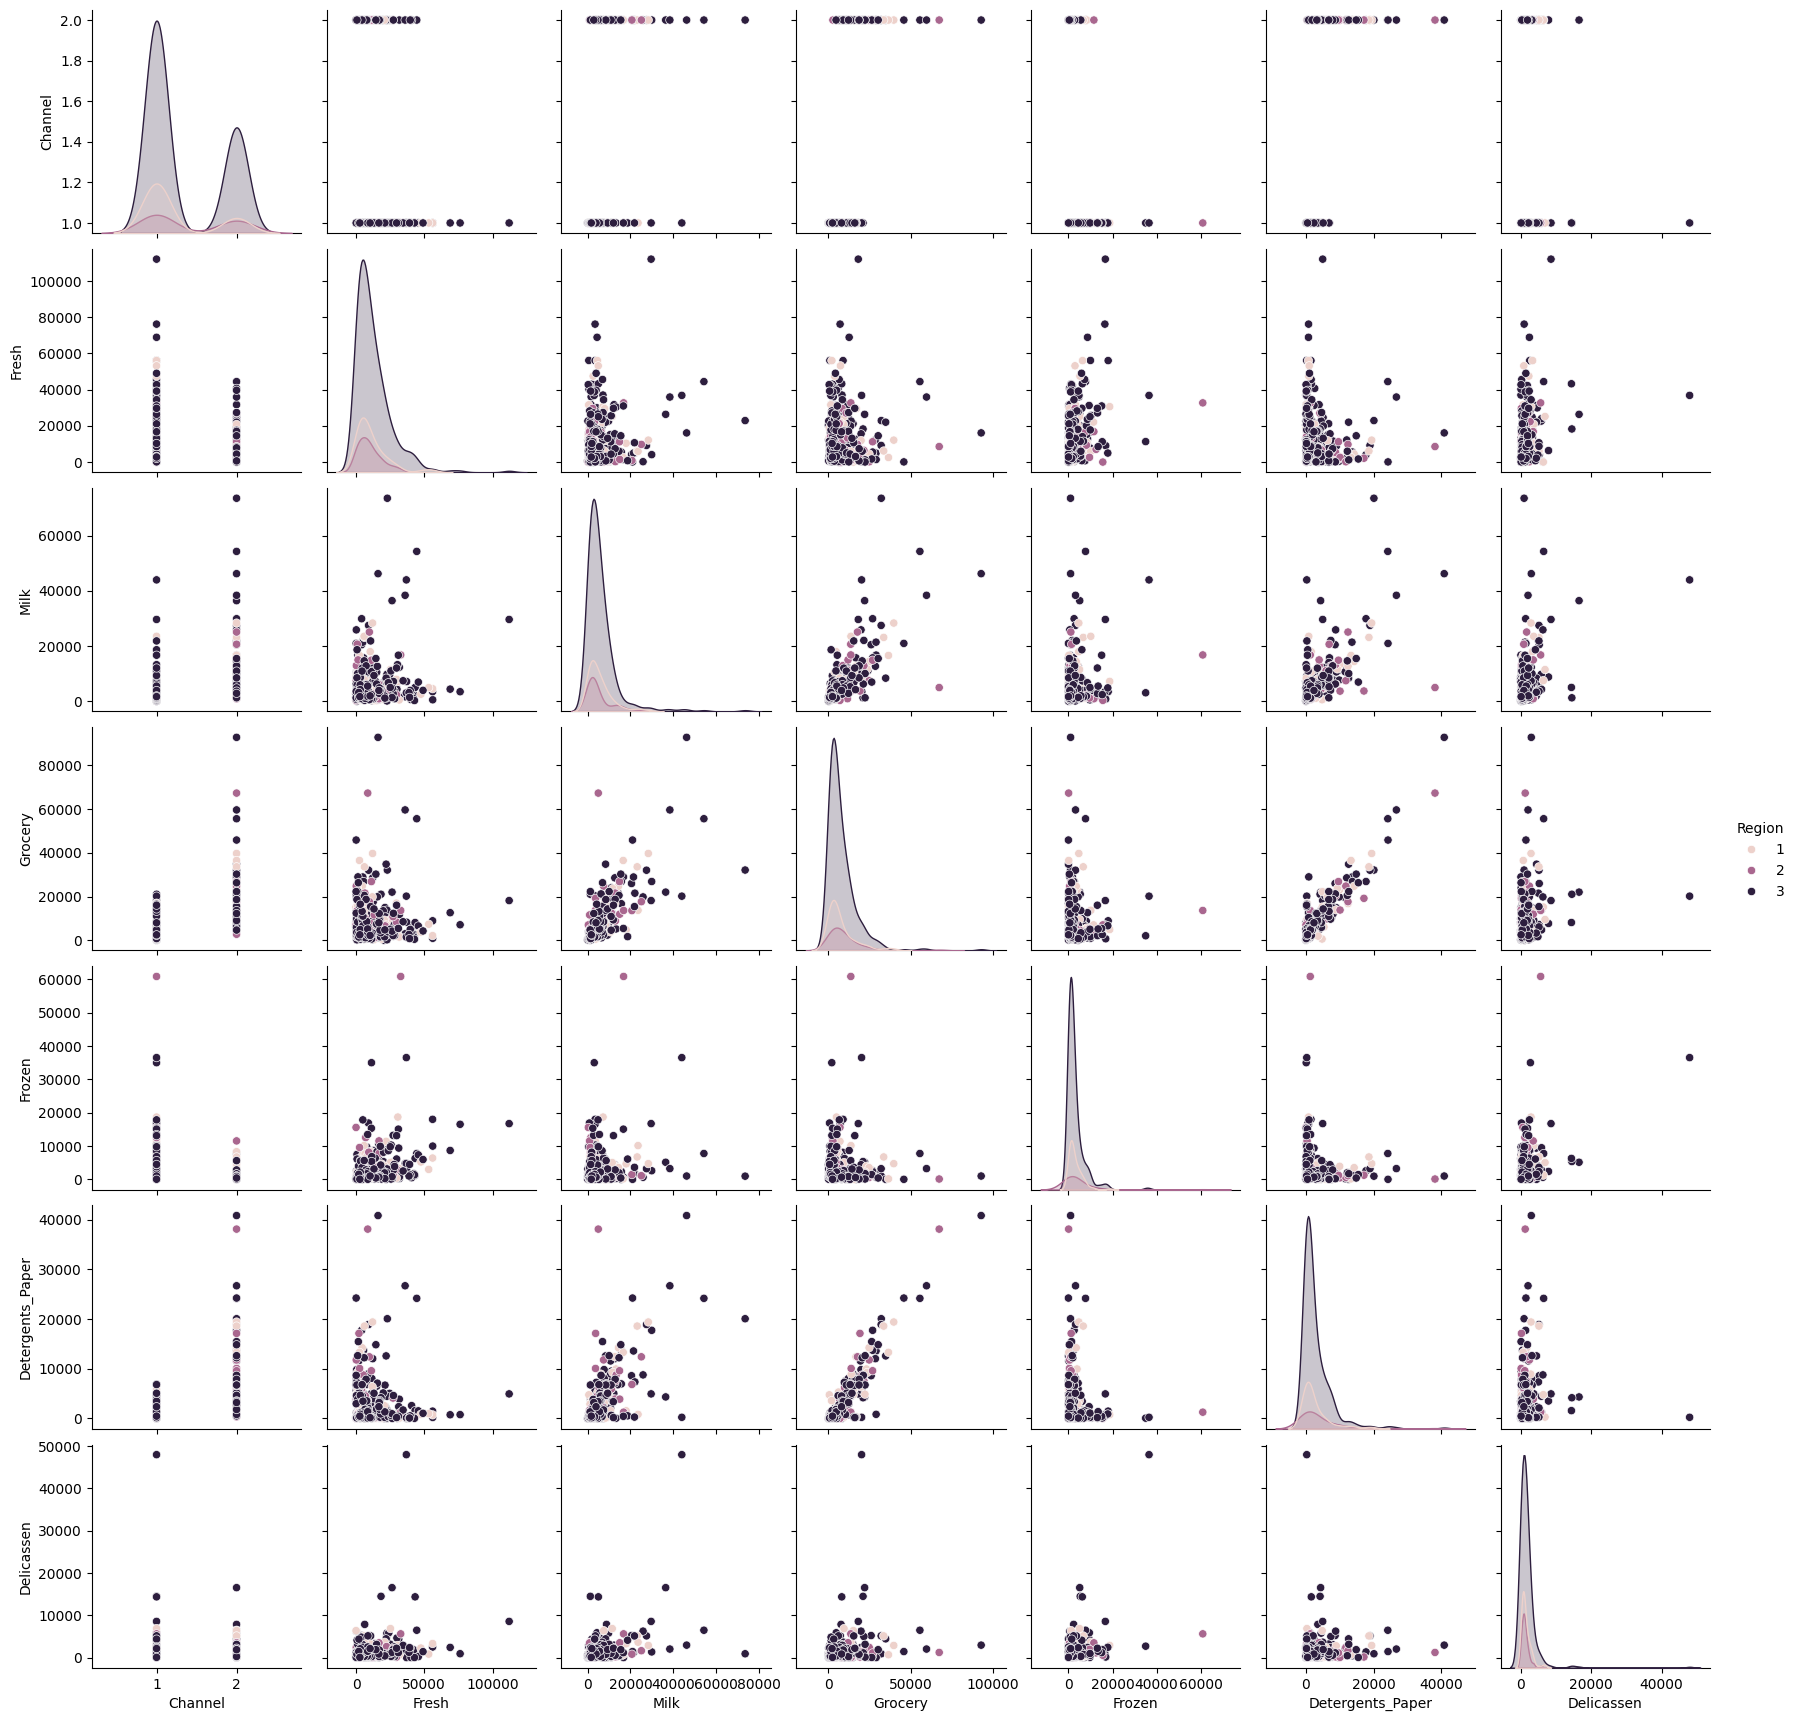

In [13]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df, hue='Region')
plt.show()

### $\textbf{DBSCAN}$

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [14]:
scaler = StandardScaler()
std_df = df.copy()
numerical_features = std_df.drop(columns=['Region', 'Channel']).columns


std_df[numerical_features] = scaler.fit_transform(std_df[numerical_features])
std_df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,3
1,2,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,3
2,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,3
3,1,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,3
4,2,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,3


**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

In [15]:
features = std_df.drop(columns=['Region'])
min_samples = len(features.columns) * 2
outlier_percent = []

for eps in np.linspace(0.001, 3, 50):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(features)

    outliers = clusters.tolist().count(-1)
    percent_outliers = outliers * 100 / len(clusters)

    outlier_percent.append([eps, percent_outliers])
    print(f'Epsilon: {eps:.3f}, Outlier%: {percent_outliers:.2f}%')

Epsilon: 0.001, Outlier%: 100.00%
Epsilon: 0.062, Outlier%: 100.00%
Epsilon: 0.123, Outlier%: 100.00%
Epsilon: 0.185, Outlier%: 100.00%
Epsilon: 0.246, Outlier%: 100.00%
Epsilon: 0.307, Outlier%: 86.59%
Epsilon: 0.368, Outlier%: 75.23%
Epsilon: 0.429, Outlier%: 67.05%
Epsilon: 0.491, Outlier%: 62.95%
Epsilon: 0.552, Outlier%: 57.27%
Epsilon: 0.613, Outlier%: 49.09%
Epsilon: 0.674, Outlier%: 40.23%
Epsilon: 0.735, Outlier%: 32.95%
Epsilon: 0.797, Outlier%: 27.95%
Epsilon: 0.858, Outlier%: 23.18%
Epsilon: 0.919, Outlier%: 20.23%
Epsilon: 0.980, Outlier%: 17.05%
Epsilon: 1.041, Outlier%: 15.00%
Epsilon: 1.103, Outlier%: 12.95%
Epsilon: 1.164, Outlier%: 11.82%
Epsilon: 1.225, Outlier%: 10.91%
Epsilon: 1.286, Outlier%: 9.77%
Epsilon: 1.347, Outlier%: 8.18%
Epsilon: 1.409, Outlier%: 7.95%
Epsilon: 1.470, Outlier%: 7.95%
Epsilon: 1.531, Outlier%: 7.50%
Epsilon: 1.592, Outlier%: 6.82%
Epsilon: 1.654, Outlier%: 6.14%
Epsilon: 1.715, Outlier%: 5.45%
Epsilon: 1.776, Outlier%: 5.45%
Epsilon: 1.837

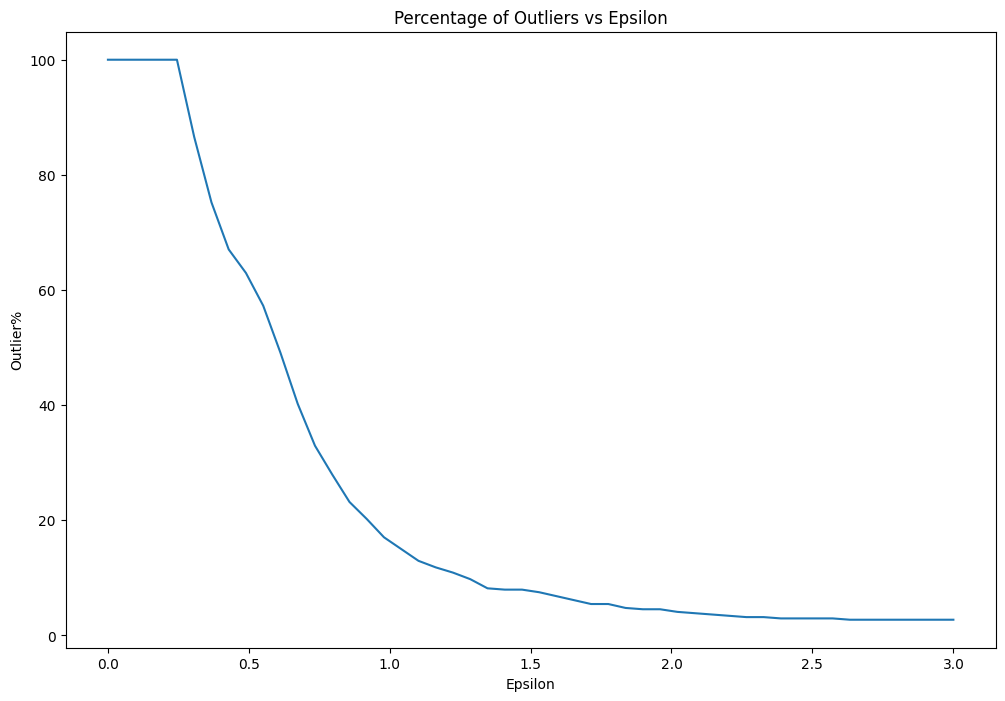

In [16]:
plt.figure(figsize=(12, 8))
plt.title("Percentage of Outliers vs Epsilon")
sns.lineplot(data=pd.DataFrame(outlier_percent, columns=['Epsilon', 'Outlier%']), x='Epsilon', y='Outlier%')
plt.show()

### $\textbf{DBSCAN with Chosen Epsilon}$

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [41]:
optimum_eps = 2

dbscan = DBSCAN(eps=optimum_eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(features)
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

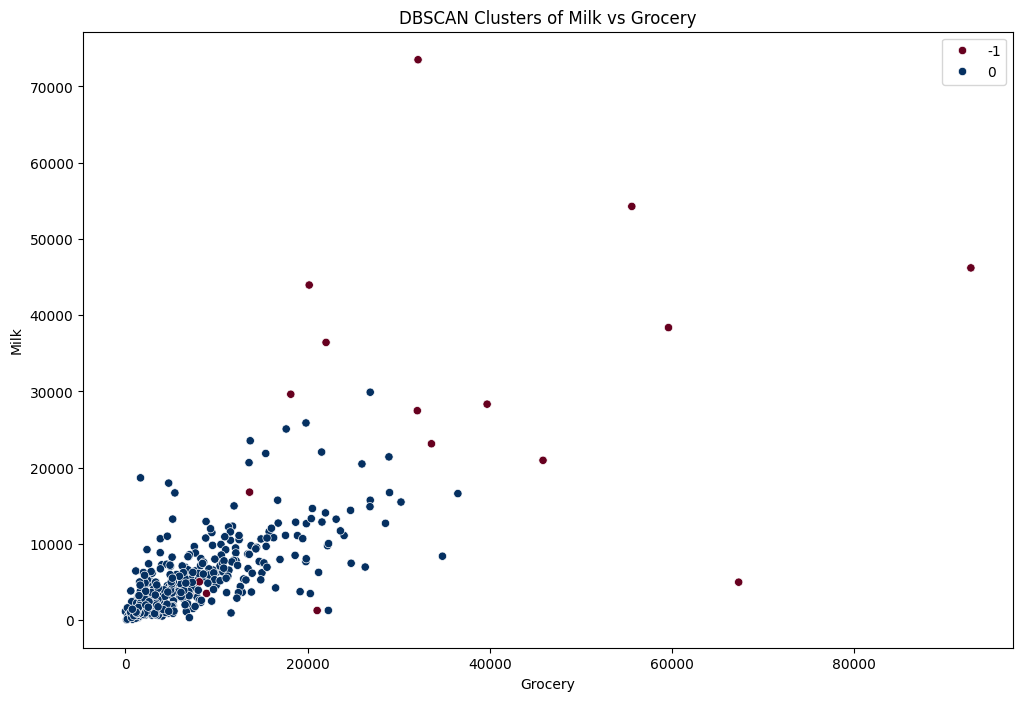

In [42]:
plt.figure(figsize=(12, 8))
plt.title("DBSCAN Clusters of Milk vs Grocery")

sns.scatterplot(data=df, x='Grocery', y='Milk', hue=dbscan_labels, palette='RdBu')
plt.show()

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

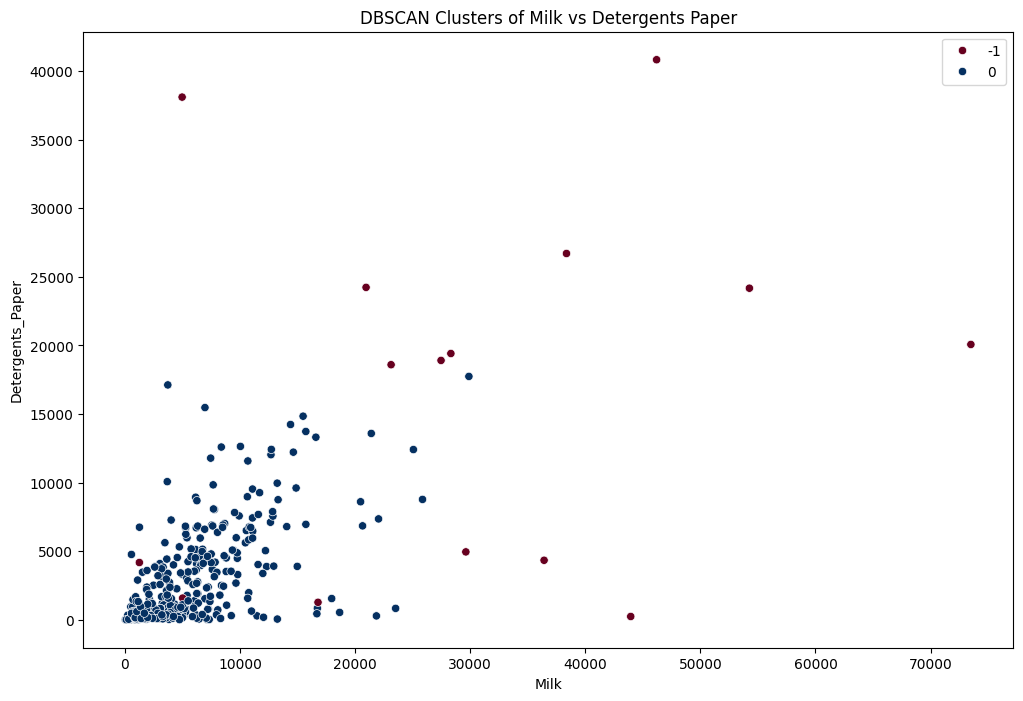

In [24]:
plt.figure(figsize=(12, 8))
plt.title("DBSCAN Clusters of Milk vs Detergents Paper")

sns.scatterplot(data=df, x='Milk', y='Detergents_Paper', hue=dbscan_labels, palette='RdBu')
plt.show()

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [25]:
df["Labels"] = dbscan_labels
df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Labels
0,2,12669,9656,7561,214,2674,1338,3,0
1,2,7057,9810,9568,1762,3293,1776,3,0
2,2,6353,8808,7684,2405,3516,7844,3,0
3,1,13265,1196,4221,6404,507,1788,3,0
4,2,22615,5410,7198,3915,1777,5185,3,0


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [34]:
cluster_means = df.drop(columns=["Region", "Channel"]).groupby('Labels').mean()
cluster_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,31601.555556,25574.166667,32205.277778,12694.000000,13882.722222,7869.444444
0,11164.225118,4952.658768,6916.746445,2661.511848,2412.246445,1254.248815


**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [36]:
minmax_scaler = MinMaxScaler()
minmax_cluster_means = cluster_means.copy()
minmax_cluster_means[cluster_means.columns] = minmax_scaler.fit_transform(cluster_means[cluster_means.columns])
minmax_cluster_means.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.0,1.0,1.0,1.0,1.0,1.0
0,0.0,0.0,0.0,0.0,0.0,0.0


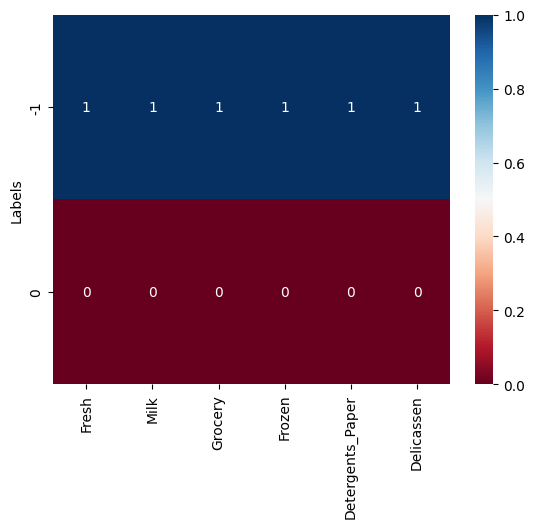

In [37]:
sns.heatmap(minmax_cluster_means, annot=True, cmap='RdBu')
plt.show()

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

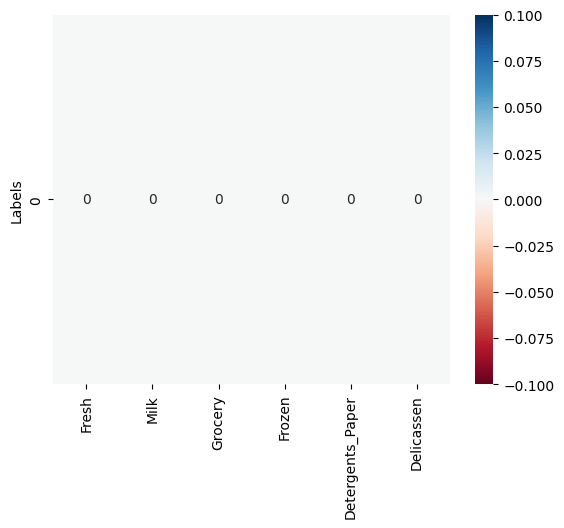

In [38]:
no_outliers = minmax_cluster_means[minmax_cluster_means.index != -1]
sns.heatmap(no_outliers, annot=True, cmap='RdBu')
plt.show()

**TASK: What spending category were the two clusters mode different in?**

The outliers and DBSCAN clusters were different in all categories. When the outliers were removed, the DBSCAN cluster min-max scaled spending means still retained their values based on the heatmaps shown above.